In [7]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from random import randint
import seaborn as sns
import pickle
import time

In [8]:
minst = keras.datasets.mnist

((x_train, y_train), (x_test, y_test)) = minst.load_data()

x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

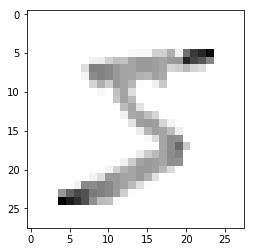

In [9]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [19]:
# results = []

# load last file
with open ('results', 'rb') as fp:
    results = pickle.load(fp)

for i in range(1, 2000):
    LAYER_SIZE = randint(1, 256)
    t0 = time.clock()
    model = keras.models.Sequential()
    
    model.add(keras.layers.Flatten())
    
    LAYER_NUMBER = randint(1, 5)
    for _ in range(LAYER_NUMBER+1):
      model.add(keras.layers.Dense(LAYER_SIZE, activation=keras.activations.relu))
      
    model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

    model.compile(optimizer=keras.optimizers.Adam(), 
                  loss=keras.losses.sparse_categorical_crossentropy,
                  metric=[keras.metrics.binary_accuracy])

    model.fit(x_train, y_train, epochs=3, verbose='False')

    t1 = time.clock()
    total_time = t1-t0
    val_loss =  model.evaluate(x_test, y_test, verbose='False')
    results.append([LAYER_SIZE, LAYER_NUMBER, total_time, val_loss, total_time*val_loss])
    print(results[-1])
    
    # save every 5
    if i % 5 == 0:
      with open('results', 'wb') as fp:
        pickle.dump(results, fp)
      print('saved')

Epoch 1/3
Epoch 2/3
Epoch 3/3
[179, 4, 57.539438765081286, 0.12232282843999565, 7.038386896594673]
Epoch 1/3
Epoch 2/3
Epoch 3/3
[115, 5, 51.190539947641355, 0.11493647809978574, 5.883660373608288]
Epoch 1/3
Epoch 2/3
Epoch 3/3
[91, 5, 49.0095121373397, 0.10486216059345752, 5.139243332352721]
Epoch 1/3
Epoch 2/3
Epoch 3/3
[90, 5, 51.64668593269289, 0.13712652792409064, 7.08213072073615]
Epoch 1/3
Epoch 2/3
Epoch 3/3
[158, 3, 53.16067019430511, 0.12744704061783851, 6.775170093525121]
saved
Epoch 1/3
Epoch 2/3
Epoch 3/3
[97, 2, 45.302255818508456, 0.10942563252700492, 4.9572279978404765]
Epoch 1/3
Epoch 2/3
Epoch 3/3
[109, 5, 54.88195439271385, 0.12780486687999218, 7.0141808752745956]
Epoch 1/3
Epoch 2/3
Epoch 3/3
[44, 2, 44.018629147234606, 0.12933873884342612, 5.693313979519801]
Epoch 1/3
Epoch 2/3
Epoch 3/3
[43, 5, 49.126814528716295, 0.12864415802136064, 6.319877691318255]
Epoch 1/3
Epoch 2/3
Epoch 3/3
[21, 3, 42.19214697030475, 0.17401993998885154, 7.342274883773237]
saved
Epoch 1/3

KeyboardInterrupt: 

In [20]:
# open and label
with open ('results', 'rb') as fp:
    results = pickle.load(fp)
df = pd.DataFrame(results, columns=['LAYER_SIZE', 'LAYER_NUMBER', 'total_time', 'val_loss', 'total_time*val_loss'])

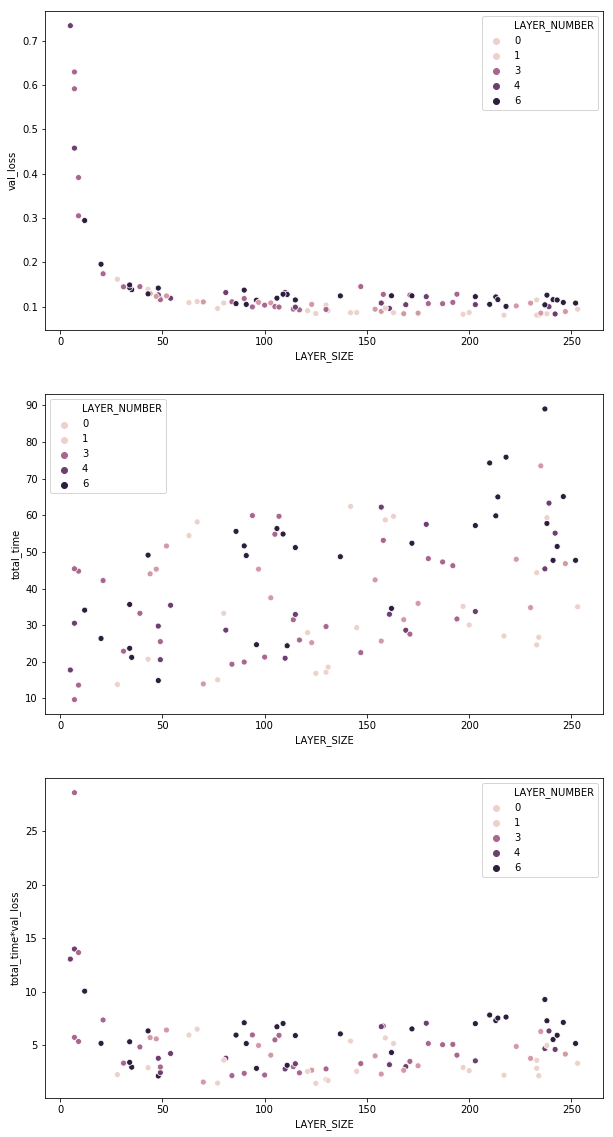

In [21]:
# visualize
fig, axs = plt.subplots(nrows=3, figsize=(10,20))
sns.scatterplot(x='LAYER_SIZE', y='val_loss', data=df, ax=axs[0], hue='LAYER_NUMBER')
sns.scatterplot(x='LAYER_SIZE', y='total_time', data=df, ax=axs[1], hue='LAYER_NUMBER')
sns.scatterplot(x='LAYER_SIZE', y='total_time*val_loss', data=df, ax=axs[2], hue='LAYER_NUMBER')

In [24]:
type(x_train)

numpy.ndarray

In [31]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)